<a href="https://colab.research.google.com/github/michael-borck/ISYS2001/blob/main/stocks_daily_return_staff_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Return of Stock Data

## Daily Return formula

Visiting a financial website that provides stock price information. Type a company’s name or its stock’s ticker symbol. Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was \$36.75 yesterday and that its closing price was \$35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract \$35.50 from \$36.75 to get \$1.25.

Now divide the results by the previous day's closing prices to calculate the daily return.  Multiply this by 100 to convert to a percentage.  So $1.25 divided by #35.50 equals 0.035.  Multiply 0.035 by 100 to 3.5 percent.

    Daily return = (Today prices - Yesterday price) / Yesterday price



To find the URL, navigate to Yahoo finance, type in NAB.AX, click the 'Historical' tab.  towards the right is a download option.  right click on the download link and select 'Copy Link Address' form the popup menu.  No paste to the URL assignment statement.

In [ ]:
!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1617062400&period2=1648598400&interval=1d&events=history&includeAdjustedClose=true" > stocks.csv

## Read CSV file

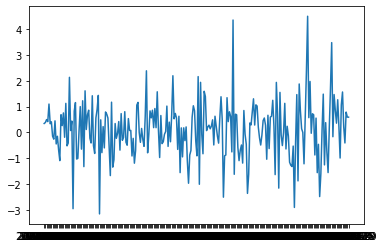

In [22]:
# Calculate the return, use 'Adj Close', or column 6 (index 5)
ADJ_CLOSE = 5  # Constant used for readability
DATE = 0 # Date is in Column 1, index 0

daily_return_percentage = [] # list to store calculations
dates = [] # Will parallel the daily_return_percentage

# get the data
with open('stocks.csv', 'r') as f:
    fields = f.readline().split(',').
    data = f.read()

# traverse over each row
stocks = [] # Could use a dictionary, with date as key
for row in data.split('\n'):
  fields = row.split(',')
  stocks.append(fields)

# process each row
yesterday_price = float(stocks[0][ADJ_CLOSE])
for day in stocks[1:]:  # starting from second element!
  todays_price = float(day[ADJ_CLOSE])
  daily_return = ((todays_price - yesterdays_price) / yesterdays_price) * 100  
  daily_return_percentage.append(daily_return)
  dates.append(day[DATE])
  yesterdays_price = todays_price # About to move to next day, current becomes previous


# plot the results
from matplotlib import pyplot as plt
plt.plot(dates, daily_return_percentage)


## Module: CSV

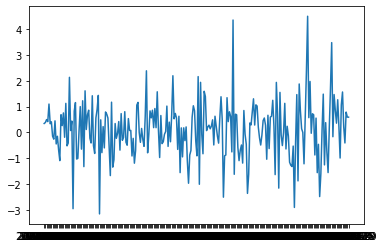

In [30]:
import csv

ADJ_CLOSE = 5  # Constant used for readability
DATE = 0 # Date is in Column 1, index 0

daily_return_percentage = [] # list to store calculations
dates = [] # Will parallel the daily_return_percentage


with open('stocks.csv') as f:
   reader = csv.reader(f, delimiter=',')
   fields = next(reader, None)  # get the headers

   yesterdays_price = float(next(reader, None)[ADJ_CLOSE])
   for row in reader:
     todays_price = float(row[ADJ_CLOSE])
     daily_return = ((todays_price - yesterdays_price) / yesterdays_price) * 100  
     daily_return_percentage.append(daily_return)
     dates.append(row[DATE])
     yesterdays_price = todays_price


# plot the results
from matplotlib import pyplot as plt
plt.plot(dates, daily_return_percentage)

## Module: Pandas

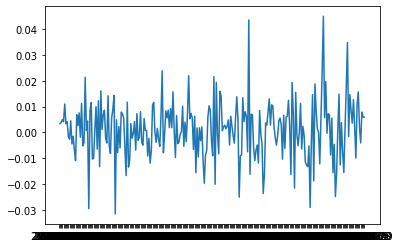

In [29]:
import pandas as pd
from matplotlib import pyplot as plt

# Load the data
data = pd.read_csv('stocks.csv')

# Calculate the return
data['Daily_return'] = data['Adj Close'] / data['Adj Close'].shift(1)-1

# Plot the results
plt.plot(data['Date'],data['Daily_return'])
